## SVM

## CatBoost

In [55]:
import pandas as pd

# Load the provided data files
file_path_neg = 'C:/Users/ddes2/Desktop/桌面/BML/Assignment_3/EAAC_neg.csv'
file_path_pos = 'C:/Users/ddes2/Desktop/桌面/BML/Assignment_3/EAAC_pos.csv'

negative_data = pd.read_csv(file_path_neg)
positive_data = pd.read_csv(file_path_pos)

# Display the first few rows of each dataset for review
negative_data_head = negative_data.head()
positive_data_head = positive_data.head()

negative_data_head, positive_data_head


(   Unnamed: 0       #  SW.1.A  SW.1.C  SW.1.D  SW.1.E  SW.1.F  SW.1.G  SW.1.H  \
 0           0  Q2RBM4     0.0     0.0     0.0     0.2     0.0     0.0     0.0   
 1           1  Q2RBM4     0.0     0.0     0.2     0.0     0.0     0.0     0.2   
 2           2  Q2RBM4     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3           3  Q2RBM4     0.0     0.0     0.0     0.0     0.2     0.0     0.0   
 4           4  Q2RBM4     0.0     0.2     0.2     0.0     0.2     0.0     0.0   
 
    SW.1.I  ...  SW.27.M  SW.27.N  SW.27.P  SW.27.Q  SW.27.R  SW.27.S  SW.27.T  \
 0     0.0  ...      0.2      0.2      0.0      0.0      0.0      0.0      0.2   
 1     0.0  ...      0.0      0.2      0.0      0.0      0.0      0.0      0.0   
 2     0.0  ...      0.0      0.2      0.0      0.0      0.0      0.0      0.0   
 3     0.0  ...      0.0      0.0      0.4      0.2      0.0      0.0      0.0   
 4     0.0  ...      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
 
    SW.27.V 

PCA降維，然後使用 Elbow plot 

c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\clust

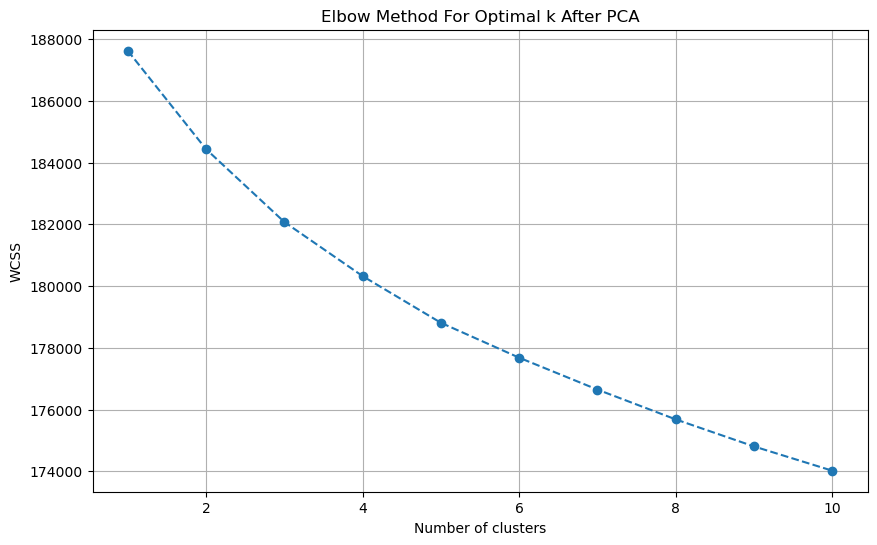

(220,
 [187625.19246737697,
  184436.53068838146,
  182075.96876039734,
  180322.6184579281,
  178810.2322759988,
  177678.5332509071,
  176645.18354621113,
  175679.65835630384,
  174803.3430488622,
  174016.59586768795])

In [56]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Reload the data
negative_data = pd.read_csv(file_path_neg)
negative_data_numeric = negative_data.drop(columns=['Unnamed: 0', '#'])

# Applying PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Keep 95% of variance
negative_data_pca = pca.fit_transform(negative_data_numeric)

# Number of components PCA chose
num_components = pca.n_components_

# Reapplying the Elbow Method with reduced dimensions
wcss_pca = []
for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(negative_data_pca)
    wcss_pca.append(kmeans_pca.inertia_)

# Plotting the results of Elbow Method after PCA
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_pca, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k After PCA')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

num_components, wcss_pca


In [57]:
pca = PCA(n_components=0.95)
negative_data_pca = pca.fit_transform(negative_data_numeric)
kmeans = KMeans(n_clusters=10, random_state=42)
negative_data_clusters = kmeans.fit_predict(negative_data_pca)
negative_data['Cluster'] = negative_data_clusters

c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [58]:
samples_per_cluster = len(positive_data) // 10
balanced_neg_data = negative_data.groupby('Cluster').apply(lambda x: x.sample(n=samples_per_cluster, random_state=42)).reset_index(drop=True)
combined_data = pd.concat([positive_data, balanced_neg_data], ignore_index=True)
combined_data['Label'] = [1 if i < len(positive_data) else 0 for i in range(len(combined_data))]

len(combined_data)


9920

拆分數據集

In [59]:
#拆 8:1:1

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# X = combined_data.drop(columns=['Unnamed: 0', '#', 'Cluster', 'Label'])
y = combined_data['Label']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


ValueError: could not convert string to float: 'A0A0N7KM63'

In [ ]:
# # 包括 '#' 欄位
# X = combined_data.drop(columns=['Cluster', 'Label'])
# y = combined_data['Label']

# # 從特徵中排除 '#' 欄位以進行標準化
# X_for_scaling = X.drop(columns=['#'])

# # 包括 ID 和 '#' 欄位在分割過程中
# X_train, X_temp, y_train, y_temp, ids_train, ids_temp, hash_train, hash_temp = train_test_split(
#     X, y, combined_data['Unnamed: 0'], combined_data['#'], test_size=0.2, random_state=42
# )

# X_val, X_test, y_val, y_test, ids_val, ids_test, hash_val, hash_test = train_test_split(
#     X_temp, y_temp, ids_temp, hash_temp, test_size=0.5, random_state=42
# )

# # 標準化數據
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)
# X_test_scaled = scaler.transform(X_test)

# # 創建包含 ID 和 '#' 的測試數據 DataFrame
# test_data_with_ids = pd.DataFrame(X_test_scaled, columns=X.columns.drop(['Unnamed: 0', '#']))
# test_data_with_ids['ID'] = ids_test.reset_index(drop=True)
# test_data_with_ids['#'] = hash_test.reset_index(drop=True)
# test_data_with_ids['Label'] = y_test.reset_index(drop=True)

# # 將測試數據保存為 CSV 文件
# test_data_with_ids.to_csv('test_data_with_ids.csv', index=False)

ValueError: could not convert string to float: 'A0A0N7KM63'

In [ ]:
#拆 8:1:1

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



X = combined_data.drop(columns=['Unnamed: 0', '#', 'Cluster', 'Label'])
# y = combined_data['Label']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [ ]:
import pandas as pd
df_x_test = pd.DataFrame(X_test_scaled)
df_x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,530,531,532,533,534,535,536,537,538,539
0,-0.629189,-0.241603,-0.554713,-0.619148,2.059249,1.053724,-0.316027,-0.490908,-0.545434,-0.664793,...,-0.315167,-0.435351,-0.474068,-0.418246,-0.550739,-0.618264,1.533147,1.155445,-0.224982,-0.358612
1,-0.629189,-0.241603,1.233346,-0.619148,-0.412348,-0.570034,-0.316027,-0.490908,4.705557,-0.664793,...,-0.315167,-0.435351,-0.474068,1.934130,-0.550739,-0.618264,-0.501818,1.155445,-0.224982,-0.358612
2,0.854687,-0.241603,-0.554713,-0.619148,2.059249,1.053724,2.757494,-0.490908,-0.545434,-0.664793,...,-0.315167,-0.435351,-0.474068,-0.418246,-0.550739,-0.618264,-0.501818,1.155445,-0.224982,2.437014
3,-0.629189,-0.241603,-0.554713,-0.619148,-0.412348,-0.570034,-0.316027,1.650843,1.204896,-0.664793,...,-0.315167,-0.435351,-0.474068,1.934130,-0.550739,-0.618264,1.533147,-0.592813,-0.224982,-0.358612
4,-0.629189,-0.241603,1.233346,0.902078,-0.412348,-0.570034,-0.316027,1.650843,-0.545434,0.921435,...,-0.315167,-0.435351,1.534583,-0.418246,-0.550739,0.915510,-0.501818,-0.592813,-0.224982,-0.358612


In [ ]:
df_x_test.to_csv("C:/Users/ddes2/Desktop/桌面/BML/Assignment_3/testfile.csv")

In [ ]:
# 拆8:2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'combined_data' is your full dataset
X = combined_data.drop(columns=['Unnamed: 0', '#', 'Cluster', 'Label'])
y = combined_data['Label']

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now, 'X_train_scaled' and 'y_train' are your training data
# 'X_test_scaled' and 'y_test' are your testing data


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'combined_data' is your full dataset
X = combined_data.drop(columns=['Unnamed: 0', '#', 'Cluster', 'Label'])
y = combined_data['Label']

# First, split the dataset into training (80%) and the rest (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Then split the 20% into validation and testing sets (each 10% of the total data)
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scaling the features for all datasets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

# Now, 'X_train_scaled' and 'y_train' are your training data
# 'X_validate_scaled' and 'y_validate' are your validation data
# 'X_test_scaled' and 'y_test' are your testing data

# Saving the testing set to a CSV file
test_data = pd.DataFrame(X_test_scaled, columns=X.columns)
test_data['Label'] = y_test.reset_index(drop=True) # Reset index to align with the scaled data
test_data.to_csv('test_data.csv', index=False)


In [73]:
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(random_state=42, probability = True)
catboost_model.fit(X_train_scaled, y_train)



TypeError: CatBoostClassifier.__init__() got an unexpected keyword argument 'probability'

In [70]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# 創建 CatBoost 分類器實例
catboost_model = CatBoostClassifier(random_state=42, verbose=0)

# 定義參數網格
# param_dist = {
#     'depth': [4, 6, 8, 10],
#     'learning_rate': np.logspace(-3, 0, 10),
#     'iterations': [100, 200, 300, 500],
#     'l2_leaf_reg': [1, 3, 5, 7, 9]
# }

# 設置 RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=catboost_model, 
#     param_distributions=param_dist, 
#     n_iter=50,  # 要嘗試的參數組合數量
#     cv=10,       # 交叉驗證的折數
#     verbose=2, 
#     random_state=42, 
#     n_jobs=-1   # 使用所有可用的 CPU 核心
# )

# 擬合模型
random_search.fit(X_train_scaled, y_train)

# 最佳參數和得分
best_parameters = random_search.best_params_
best_score = random_search.best_score_

print("最佳參數：", best_parameters)
print("最佳得分：", best_score)


Fitting 10 folds for each of 50 candidates, totalling 500 fits
最佳參數： {'learning_rate': 0.046415888336127774, 'l2_leaf_reg': 9, 'iterations': 500, 'depth': 8}
最佳得分： 0.7240417570619495


In [64]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, matthews_corrcoef
from sklearn.metrics import f1_score


In [72]:
# # 使用最佳参数训练模型
# best_catboost_model = CatBoostClassifier(**best_parameters, random_state=42, verbose=0)
# best_catboost_model.fit(X_train_scaled, y_train)

# # 在测试集上进行预测
# y_pred = best_catboost_model.predict(X_test_scaled)

# # 计算混淆矩阵和各项指标
# cm = confusion_matrix(y_test, y_pred)
# tn, fp, fn, tp = cm.ravel()

# # Sensitivity (True Positive Rate)
# sensitivity = tp / (tp + fn)

# # Specificity (True Negative Rate)
# specificity = tn / (tn + fp)

# # Matthews Correlation Coefficient
# mcc = matthews_corrcoef(y_test, y_pred)

# # F1 Score
# f1 = f1_score(y_test, y_pred)

# # Accuracy
# accuracy = accuracy_score(y_test, y_pred)

# # Print the metrics
# print(f"Sensitivity (TPR): {sensitivity}")
# print(f"Specificity (TNR): {specificity}")
# print(f"Matthews Correlation Coefficient (MCC): {mcc}")
# print(f"F1 Score: {f1}")
# print(f"Accuracy: {accuracy}")


Sensitivity (TPR): 0.6829745596868885
Specificity (TNR): 0.6528066528066528
Matthews Correlation Coefficient (MCC): 0.3359008122937726
F1 Score: 0.6796494644595911
Accuracy: 0.6683467741935484


In [63]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Helper function to calculate sensitivity and specificity
def calc_sens_spec(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
    return sensitivity, specificity

# Calculate metrics for validation set
sensitivity_val, specificity_val = calc_sens_spec(y_val, y_val_pred)
accuracy_val = accuracy_score(y_val, y_val_pred)
mcc_val = matthews_corrcoef(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)

# Calculate metrics for testing set
sensitivity_test, specificity_test = calc_sens_spec(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print validation metrics
# print(f'Validation - Sensitivity: {sensitivity_val}, Specificity: {specificity_val}, '
#       f'Accuracy: {accuracy_val}, MCC: {mcc_val}, F1 Score: {f1_val}')

print(f'''Validation -
Sensitivity: {sensitivity_val}
Specificity: {specificity_val}
Accuracy: {accuracy_val}
MCC: {mcc_val}
F1 Score: {f1_val}''')

# Print test metrics
# print(f'Test - Sensitivity: {sensitivity_test}, Specificity: {specificity_test}, '
#       f'Accuracy: {accuracy_test}, MCC: {mcc_test}, F1 Score: {f1_test}')
print(f'''Test -
Sensitivity: {sensitivity_test}
Specificity: {specificity_test}
Accuracy: {accuracy_test}
MCC: {mcc_test}
F1 Score: {f1_test}''')



ValueError: Found input variables with inconsistent numbers of samples: [992, 7936]

In [74]:
import joblib

# Save the model
joblib.dump(catboost_model, 'trained_catboost_model.pkl')


['trained_catboost_model.pkl']

Val -
fpr_val: [0.         0.26262626 1.        ]
tpr_val: [0.         0.65392354 1.        ]
AUC_val: 0.6956486393106112
Test -
fpr_test: [0.         0.32640333 1.        ]
tpr_test: [0.         0.64383562 1.        ]
AUC_test: 0.658716145017515


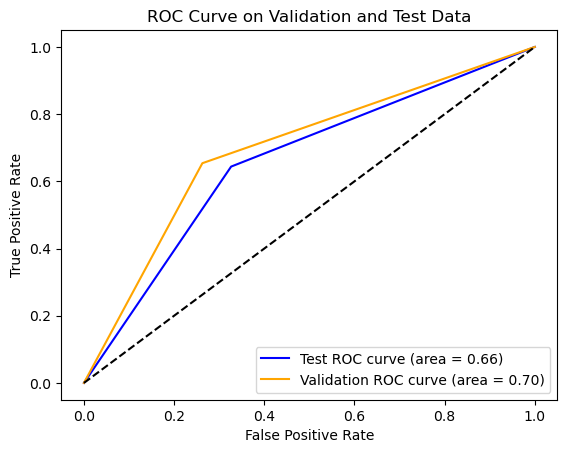

In [ ]:
# Calculate ROC curve
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)

roc_auc_val = auc(fpr_val, tpr_val)
roc_auc_test = auc(fpr_test, tpr_test)

print(f'''Val -
fpr_val: {fpr_val}
tpr_val: {tpr_val}
AUC_val: {roc_auc_val}''')

print(f'''Test -
fpr_test: {fpr_test}
tpr_test: {tpr_test}
AUC_test: {roc_auc_test}''')



plt.figure()

# Plot the ROC curve of testing
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = %0.2f)' % roc_auc_test, color='blue')
plt.plot(fpr_val, tpr_val, label='Validation ROC curve (area = %0.2f)' % roc_auc_val, color='orange')
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Validation and Test Data')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Assuming 'Unnamed: 0' is the column with the IDs
X = combined_data.drop(columns=['Cluster', 'Label'])
y = combined_data['Label']

# Include the ID column in the split
X_train, X_temp, y_train, y_temp, ids_train, ids_temp = train_test_split(
    X, y, combined_data['Unnamed: 0'], test_size=0.2, random_state=42
)

X_val, X_test, y_val, y_test, ids_val, ids_test = train_test_split(
    X_temp, y_temp, ids_temp, test_size=0.5, random_state=42
)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Create a DataFrame for the test data with IDs
test_data_with_ids = pd.DataFrame(X_test_scaled, columns=X.columns)
test_data_with_ids['ID'] = ids_test.reset_index(drop=True)
test_data_with_ids['Label'] = y_test.reset_index(drop=True)

# Save the test data with IDs to a CSV file
test_data_with_ids.to_csv('test_data_with_ids.csv', index=False)


In [43]:
import pandas as pd

# Load the provided data files
file_path_neg = 'C:/Users/ddes2/Desktop/桌面/BML/Assignment_3/EAAC_neg.csv'
file_path_pos = 'C:/Users/ddes2/Desktop/桌面/BML/Assignment_3/EAAC_pos.csv'

negative_data = pd.read_csv(file_path_neg)
positive_data = pd.read_csv(file_path_pos)

# Display the first few rows of each dataset for review
negative_data_head = negative_data.head()
positive_data_head = positive_data.head()

negative_data_head, positive_data_head


(   Unnamed: 0       #  SW.1.A  SW.1.C  SW.1.D  SW.1.E  SW.1.F  SW.1.G  SW.1.H  \
 0           0  Q2RBM4     0.0     0.0     0.0     0.2     0.0     0.0     0.0   
 1           1  Q2RBM4     0.0     0.0     0.2     0.0     0.0     0.0     0.2   
 2           2  Q2RBM4     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3           3  Q2RBM4     0.0     0.0     0.0     0.0     0.2     0.0     0.0   
 4           4  Q2RBM4     0.0     0.2     0.2     0.0     0.2     0.0     0.0   
 
    SW.1.I  ...  SW.27.M  SW.27.N  SW.27.P  SW.27.Q  SW.27.R  SW.27.S  SW.27.T  \
 0     0.0  ...      0.2      0.2      0.0      0.0      0.0      0.0      0.2   
 1     0.0  ...      0.0      0.2      0.0      0.0      0.0      0.0      0.0   
 2     0.0  ...      0.0      0.2      0.0      0.0      0.0      0.0      0.0   
 3     0.0  ...      0.0      0.0      0.4      0.2      0.0      0.0      0.0   
 4     0.0  ...      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
 
    SW.27.V 

PCA降維，然後使用 Elbow plot 

c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\clust

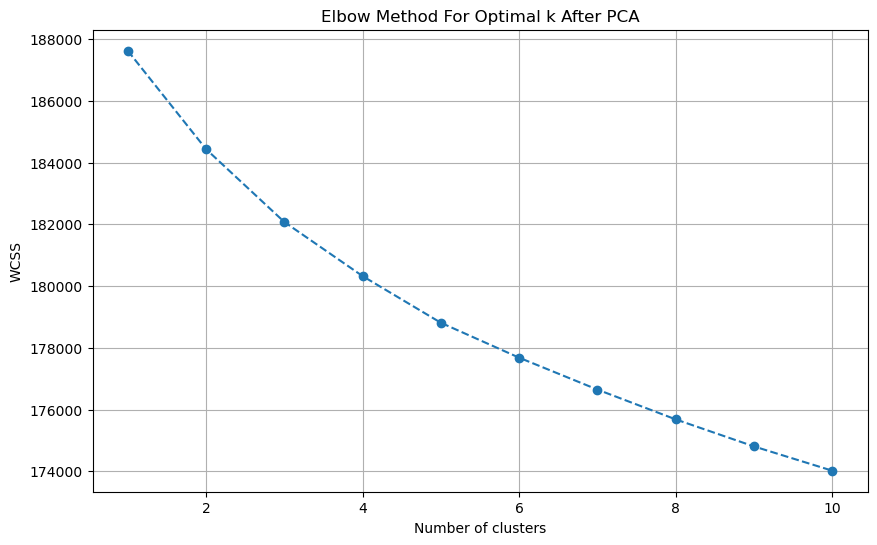

(220,
 [187625.19246737697,
  184436.53068838146,
  182075.96876039734,
  180322.6184579281,
  178810.23227599877,
  177678.5332509071,
  176645.18354621116,
  175679.65835630384,
  174803.3430488622,
  174016.59586768795])

In [44]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Reload the data
negative_data = pd.read_csv(file_path_neg)
negative_data_numeric = negative_data.drop(columns=['Unnamed: 0', '#'])

# Applying PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Keep 95% of variance
negative_data_pca = pca.fit_transform(negative_data_numeric)

# Number of components PCA chose
num_components = pca.n_components_

# Reapplying the Elbow Method with reduced dimensions
wcss_pca = []
for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(negative_data_pca)
    wcss_pca.append(kmeans_pca.inertia_)

# Plotting the results of Elbow Method after PCA
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_pca, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k After PCA')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

num_components, wcss_pca


In [45]:
pca = PCA(n_components=0.95)
negative_data_pca = pca.fit_transform(negative_data_numeric)
kmeans = KMeans(n_clusters=10, random_state=42)
negative_data_clusters = kmeans.fit_predict(negative_data_pca)
negative_data['Cluster'] = negative_data_clusters

c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [46]:
samples_per_cluster = len(positive_data) // 10
balanced_neg_data = negative_data.groupby('Cluster').apply(lambda x: x.sample(n=samples_per_cluster, random_state=42)).reset_index(drop=True)
combined_data = pd.concat([positive_data, balanced_neg_data], ignore_index=True)
combined_data['Label'] = [1 if i < len(positive_data) else 0 for i in range(len(combined_data))]

len(combined_data)


9920

拆分數據集

In [48]:
#拆 8:1:1

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# X = combined_data.drop(columns=['Unnamed: 0', '#', 'Cluster', 'Label'])
y = combined_data['Label']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [54]:
# 包括 '#' 欄位
X = combined_data.drop(columns=['Cluster', 'Label'])
y = combined_data['Label']

# 從特徵中排除 '#' 欄位以進行標準化
X_for_scaling = X.drop(columns=['#'])

# 包括 ID 和 '#' 欄位在分割過程中
X_train, X_temp, y_train, y_temp, ids_train, ids_temp, hash_train, hash_temp = train_test_split(
    X, y, combined_data['Unnamed: 0'], combined_data['#'], test_size=0.2, random_state=42
)

X_val, X_test, y_val, y_test, ids_val, ids_test, hash_val, hash_test = train_test_split(
    X_temp, y_temp, ids_temp, hash_temp, test_size=0.5, random_state=42
)

# 標準化數據
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 創建包含 ID 和 '#' 的測試數據 DataFrame
test_data_with_ids = pd.DataFrame(X_test_scaled, columns=X.columns.drop(['Unnamed: 0', '#']))
test_data_with_ids['ID'] = ids_test.reset_index(drop=True)
test_data_with_ids['#'] = hash_test.reset_index(drop=True)
test_data_with_ids['Label'] = y_test.reset_index(drop=True)

# 將測試數據保存為 CSV 文件
test_data_with_ids.to_csv('test_data_with_ids.csv', index=False)

ValueError: could not convert string to float: 'A0A0N7KM63'

In [41]:
#拆 8:1:1

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



X = combined_data.drop(columns=['Unnamed: 0', '#', 'Cluster', 'Label'])
# y = combined_data['Label']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [50]:
import pandas as pd
df_x_test = pd.DataFrame(X_test_scaled)
df_x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,530,531,532,533,534,535,536,537,538,539
0,-0.629189,-0.241603,-0.554713,-0.619148,2.059249,1.053724,-0.316027,-0.490908,-0.545434,-0.664793,...,-0.315167,-0.435351,-0.474068,-0.418246,-0.550739,-0.618264,1.533147,1.155445,-0.224982,-0.358612
1,-0.629189,-0.241603,1.233346,-0.619148,-0.412348,-0.570034,-0.316027,-0.490908,4.705557,-0.664793,...,-0.315167,-0.435351,-0.474068,1.934130,-0.550739,-0.618264,-0.501818,1.155445,-0.224982,-0.358612
2,0.854687,-0.241603,-0.554713,-0.619148,2.059249,1.053724,2.757494,-0.490908,-0.545434,-0.664793,...,-0.315167,-0.435351,-0.474068,-0.418246,-0.550739,-0.618264,-0.501818,1.155445,-0.224982,2.437014
3,-0.629189,-0.241603,-0.554713,-0.619148,-0.412348,-0.570034,-0.316027,1.650843,1.204896,-0.664793,...,-0.315167,-0.435351,-0.474068,1.934130,-0.550739,-0.618264,1.533147,-0.592813,-0.224982,-0.358612
4,-0.629189,-0.241603,1.233346,0.902078,-0.412348,-0.570034,-0.316027,1.650843,-0.545434,0.921435,...,-0.315167,-0.435351,1.534583,-0.418246,-0.550739,0.915510,-0.501818,-0.592813,-0.224982,-0.358612


In [33]:
df_x_test.to_csv("C:/Users/ddes2/Desktop/桌面/BML/Assignment_3/testfile.csv")

In [ ]:

df_EAAC = pd.DataFrame(EAAC)
df_EAAC.head()

In [5]:
# 拆8:2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'combined_data' is your full dataset
X = combined_data.drop(columns=['Unnamed: 0', '#', 'Cluster', 'Label'])
y = combined_data['Label']

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now, 'X_train_scaled' and 'y_train' are your training data
# 'X_test_scaled' and 'y_test' are your testing data


In [8]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42, probability = True)
svm_model.fit(X_train_scaled, y_train)


# 在驗證集和測試集上評估模型效果
# y_val_pred = svm_model.predict(X_val_scaled)
y_test_pred = svm_model.predict(X_test_scaled)


In [15]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Helper function to calculate sensitivity and specificity
def calc_sens_spec(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
    return sensitivity, specificity

# Calculate metrics for validation set
sensitivity_val, specificity_val = calc_sens_spec(y_val, y_val_pred)
accuracy_val = accuracy_score(y_val, y_val_pred)
mcc_val = matthews_corrcoef(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)

# Calculate metrics for testing set
sensitivity_test, specificity_test = calc_sens_spec(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print validation metrics
# print(f'Validation - Sensitivity: {sensitivity_val}, Specificity: {specificity_val}, '
#       f'Accuracy: {accuracy_val}, MCC: {mcc_val}, F1 Score: {f1_val}')

print(f'''Validation -
Sensitivity: {sensitivity_val}
Specificity: {specificity_val}
Accuracy: {accuracy_val}
MCC: {mcc_val}
F1 Score: {f1_val}''')

# Print test metrics
# print(f'Test - Sensitivity: {sensitivity_test}, Specificity: {specificity_test}, '
#       f'Accuracy: {accuracy_test}, MCC: {mcc_test}, F1 Score: {f1_test}')
print(f'''Test -
Sensitivity: {sensitivity_test}
Specificity: {specificity_test}
Accuracy: {accuracy_test}
MCC: {mcc_test}
F1 Score: {f1_test}''')



Validation -
Sensitivity: 0.6539235412474849
Specificity: 0.7373737373737373
Accuracy: 0.6955645161290323
MCC: 0.39264021617211825
F1 Score: 0.6827731092436974
Test -
Sensitivity: 0.6438356164383562
Specificity: 0.6735966735966736
Accuracy: 0.6582661290322581
MCC: 0.31735160378487526
F1 Score: 0.6599799398194583


Val -
fpr_val: [0.         0.26262626 1.        ]
tpr_val: [0.         0.65392354 1.        ]
AUC_val: 0.6956486393106112
Test -
fpr_test: [0.         0.32640333 1.        ]
tpr_test: [0.         0.64383562 1.        ]
AUC_test: 0.658716145017515


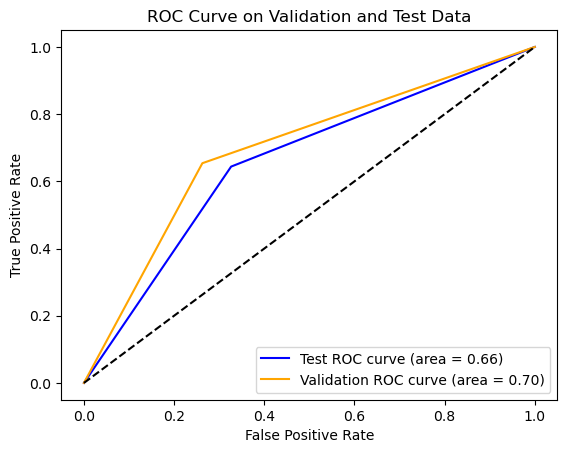

In [16]:
# Calculate ROC curve
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)

roc_auc_val = auc(fpr_val, tpr_val)
roc_auc_test = auc(fpr_test, tpr_test)

print(f'''Val -
fpr_val: {fpr_val}
tpr_val: {tpr_val}
AUC_val: {roc_auc_val}''')

print(f'''Test -
fpr_test: {fpr_test}
tpr_test: {tpr_test}
AUC_test: {roc_auc_test}''')



plt.figure()

# Plot the ROC curve of testing
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = %0.2f)' % roc_auc_test, color='blue')
plt.plot(fpr_val, tpr_val, label='Validation ROC curve (area = %0.2f)' % roc_auc_val, color='orange')
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Validation and Test Data')
plt.legend(loc="lower right")
plt.show()


In [34]:
# Assuming 'Unnamed: 0' is the column with the IDs
X = combined_data.drop(columns=['Cluster', 'Label'])
y = combined_data['Label']

# Include the ID column in the split
X_train, X_temp, y_train, y_temp, ids_train, ids_temp = train_test_split(
    X, y, combined_data['Unnamed: 0'], test_size=0.2, random_state=42
)

X_val, X_test, y_val, y_test, ids_val, ids_test = train_test_split(
    X_temp, y_temp, ids_temp, test_size=0.5, random_state=42
)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Create a DataFrame for the test data with IDs
test_data_with_ids = pd.DataFrame(X_test_scaled, columns=X.columns)
test_data_with_ids['ID'] = ids_test.reset_index(drop=True)
test_data_with_ids['Label'] = y_test.reset_index(drop=True)

# Save the test data with IDs to a CSV file
test_data_with_ids.to_csv('test_data_with_ids.csv', index=False)


# Decision Tree

In [138]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model
decision_tree_model = DecisionTreeClassifier(random_state = 42, max_depth = 5)

# Train the model
decision_tree_model.fit(X_train_scaled, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [139]:
# 在驗證集和測試集上評估模型效果
y_val_pred = decision_tree_model.predict(X_val_scaled)
y_test_pred = decision_tree_model.predict(X_test_scaled)


In [140]:
y_val_proba = decision_tree_model.predict_proba(X_val_scaled)[:, 1]
y_test_proba = decision_tree_model.predict_proba(X_test_scaled)[:, 1]

In [141]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Helper function to calculate sensitivity and specificity
def calc_sens_spec(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
    return sensitivity, specificity

# Calculate metrics for validation set
sensitivity_val, specificity_val = calc_sens_spec(y_val, y_val_pred)
accuracy_val = accuracy_score(y_val, y_val_pred)
mcc_val = matthews_corrcoef(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)

# Calculate metrics for testing set
sensitivity_test, specificity_test = calc_sens_spec(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print validation metrics
# print(f'Validation - Sensitivity: {sensitivity_val}, Specificity: {specificity_val}, '
#       f'Accuracy: {accuracy_val}, MCC: {mcc_val}, F1 Score: {f1_val}')

print(f'''Validation -
Sensitivity: {sensitivity_val}
Specificity: {specificity_val}
Accuracy: {accuracy_val}
MCC: {mcc_val}
F1 Score: {f1_val}''')

# Print test metrics
# print(f'Test - Sensitivity: {sensitivity_test}, Specificity: {specificity_test}, '
#       f'Accuracy: {accuracy_test}, MCC: {mcc_test}, F1 Score: {f1_test}')
print(f'''Test -
Sensitivity: {sensitivity_test}
Specificity: {specificity_test}
Accuracy: {accuracy_test}
MCC: {mcc_test}
F1 Score: {f1_test}''')



Validation -
Sensitivity: 0.6156941649899397
Specificity: 0.7131313131313132
Accuracy: 0.6643145161290323
MCC: 0.3303754724881379
F1 Score: 0.6476190476190478
Test -
Sensitivity: 0.6105675146771037
Specificity: 0.7110187110187111
Accuracy: 0.6592741935483871
MCC: 0.32277026839819556
F1 Score: 0.6486486486486486


Val -
fpr_val: [0.         0.0040404  0.02222222 0.02424242 0.02626263 0.03434343
 0.03636364 0.06666667 0.06666667 0.11919192 0.11919192 0.14141414
 0.15959596 0.17979798 0.18181818 0.22222222 0.22626263 0.28686869
 0.35757576 0.46060606 0.56767677 0.57979798 0.59191919 0.98383838
 0.9979798  1.        ]
tpr_val: [0.         0.01408451 0.0945674  0.10663984 0.12072435 0.17102616
 0.19114688 0.24949698 0.2555332  0.3360161  0.34004024 0.37625755
 0.41247485 0.43661972 0.44668008 0.50704225 0.5110664  0.61569416
 0.68008048 0.74849095 0.84305835 0.86720322 0.8832998  0.98792757
 0.99597586 1.        ]
AUC_val: 0.713582505131801
Test -
fpr_test: [0.         0.002079   0.02079002 0.02910603 0.03118503 0.04158004
 0.04989605 0.07484407 0.07692308 0.12058212 0.12058212 0.13513514
 0.15800416 0.17255717 0.17671518 0.2037422  0.20582121 0.28898129
 0.33887734 0.46569647 0.57588358 0.59251559 0.61746362 0.61746362
 0.98544699 0.997921   1.        ]
tpr_test: [0.         0.02348337 0.09784736 0

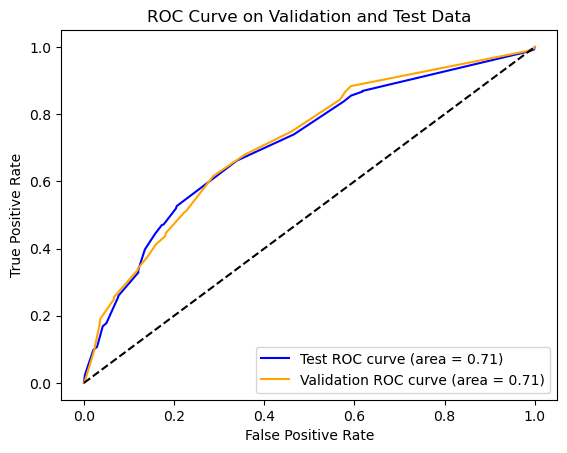

In [142]:
# Calculate ROC curve
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

roc_auc_val = auc(fpr_val, tpr_val)
roc_auc_test = auc(fpr_test, tpr_test)

print(f'''Val -
fpr_val: {fpr_val}
tpr_val: {tpr_val}
AUC_val: {roc_auc_val}''')

print(f'''Test -
fpr_test: {fpr_test}
tpr_test: {tpr_test}
AUC_test: {roc_auc_test}''')



plt.figure()

# Plot the ROC curve of testing
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = %0.2f)' % roc_auc_test, color='blue')
plt.plot(fpr_val, tpr_val, label='Validation ROC curve (area = %0.2f)' % roc_auc_val, color='orange')
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Validation and Test Data')
plt.legend(loc="lower right")
plt.show()


# Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Initiate Random Forest Model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train Model
random_forest_model.fit(X_train_scaled, y_train)



RandomForestClassifier(random_state=42)

In [25]:
# 在驗證集和測試集上評估模型效果
y_val_pred = random_forest_model.predict(X_val_scaled)
y_test_pred = random_forest_model.predict(X_test_scaled)


In [26]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Helper function to calculate sensitivity and specificity
def calc_sens_spec(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
    return sensitivity, specificity

# Calculate metrics for validation set
sensitivity_val, specificity_val = calc_sens_spec(y_val, y_val_pred)
accuracy_val = accuracy_score(y_val, y_val_pred)
mcc_val = matthews_corrcoef(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)

# Calculate metrics for testing set
sensitivity_test, specificity_test = calc_sens_spec(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print validation metrics
# print(f'Validation - Sensitivity: {sensitivity_val}, Specificity: {specificity_val}, '
#       f'Accuracy: {accuracy_val}, MCC: {mcc_val}, F1 Score: {f1_val}')

print(f'''Validation -
Sensitivity: {sensitivity_val}
Specificity: {specificity_val}
Accuracy: {accuracy_val}
MCC: {mcc_val}
F1 Score: {f1_val}''')

# Print test metrics
# print(f'Test - Sensitivity: {sensitivity_test}, Specificity: {specificity_test}, '
#       f'Accuracy: {accuracy_test}, MCC: {mcc_test}, F1 Score: {f1_test}')
print(f'''Test -
Sensitivity: {sensitivity_test}
Specificity: {specificity_test}
Accuracy: {accuracy_test}
MCC: {mcc_test}
F1 Score: {f1_test}''')



Validation -
Sensitivity: 0.7122736418511066
Specificity: 0.7111111111111111
Accuracy: 0.7116935483870968
MCC: 0.4233847529622177
F1 Score: 0.7122736418511065
Test -
Sensitivity: 0.7045009784735812
Specificity: 0.632016632016632
Accuracy: 0.6693548387096774
MCC: 0.3375187807513576
F1 Score: 0.6870229007633587


Val -
fpr_val: [0.         0.28888889 1.        ]
tpr_val: [0.         0.71227364 1.        ]
AUC_val: 0.711692376481109
Test -
fpr_test: [0.         0.36798337 1.        ]
tpr_test: [0.         0.70450098 1.        ]
AUC_test: 0.6682588052451066


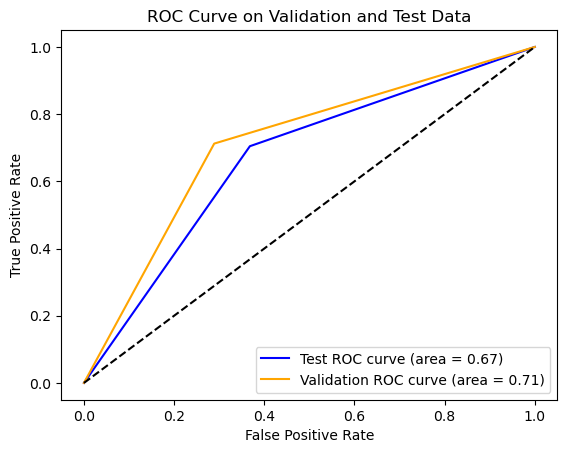

In [27]:
# Calculate ROC curve
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)

roc_auc_val = auc(fpr_val, tpr_val)
roc_auc_test = auc(fpr_test, tpr_test)

print(f'''Val -
fpr_val: {fpr_val}
tpr_val: {tpr_val}
AUC_val: {roc_auc_val}''')

print(f'''Test -
fpr_test: {fpr_test}
tpr_test: {tpr_test}
AUC_test: {roc_auc_test}''')



plt.figure()

# Plot the ROC curve of testing
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = %0.2f)' % roc_auc_test, color='blue')
plt.plot(fpr_val, tpr_val, label='Validation ROC curve (area = %0.2f)' % roc_auc_val, color='orange')
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Validation and Test Data')
plt.legend(loc="lower right")
plt.show()


# MLP

In [29]:
from sklearn.neural_network import MLPClassifier

# Initiate Random Forest Model
mlp_model = MLPClassifier(max_iter= 5, random_state=42)

# Train Model
mlp_model.fit(X_train_scaled, y_train)



c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=5, random_state=42)

In [30]:
# 在驗證集和測試集上評估模型效果
y_val_pred = mlp_model.predict(X_val_scaled)
y_test_pred = mlp_model.predict(X_test_scaled)


In [31]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Helper function to calculate sensitivity and specificity
def calc_sens_spec(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
    return sensitivity, specificity

# Calculate metrics for validation set
sensitivity_val, specificity_val = calc_sens_spec(y_val, y_val_pred)
accuracy_val = accuracy_score(y_val, y_val_pred)
mcc_val = matthews_corrcoef(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)

# Calculate metrics for testing set
sensitivity_test, specificity_test = calc_sens_spec(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print validation metrics
# print(f'Validation - Sensitivity: {sensitivity_val}, Specificity: {specificity_val}, '
#       f'Accuracy: {accuracy_val}, MCC: {mcc_val}, F1 Score: {f1_val}')

print(f'''Validation -
Sensitivity: {sensitivity_val}
Specificity: {specificity_val}
Accuracy: {accuracy_val}
MCC: {mcc_val}
F1 Score: {f1_val}''')

# Print test metrics
# print(f'Test - Sensitivity: {sensitivity_test}, Specificity: {specificity_test}, '
#       f'Accuracy: {accuracy_test}, MCC: {mcc_test}, F1 Score: {f1_test}')
print(f'''Test -
Sensitivity: {sensitivity_test}
Specificity: {specificity_test}
Accuracy: {accuracy_test}
MCC: {mcc_test}
F1 Score: {f1_test}''')



Validation -
Sensitivity: 0.6800804828973843
Specificity: 0.6727272727272727
Accuracy: 0.6764112903225806
MCC: 0.35281851179470647
F1 Score: 0.6780341023069208
Test -
Sensitivity: 0.6771037181996086
Specificity: 0.6340956340956341
Accuracy: 0.65625
MCC: 0.3114852544444071
F1 Score: 0.669893514036786


Val -
fpr_val: [0.         0.32727273 1.        ]
tpr_val: [0.         0.68008048 1.        ]
AUC_val: 0.6764038778123285
Test -
fpr_test: [0.         0.36590437 1.        ]
tpr_test: [0.         0.67710372 1.        ]
AUC_test: 0.6555996761476213


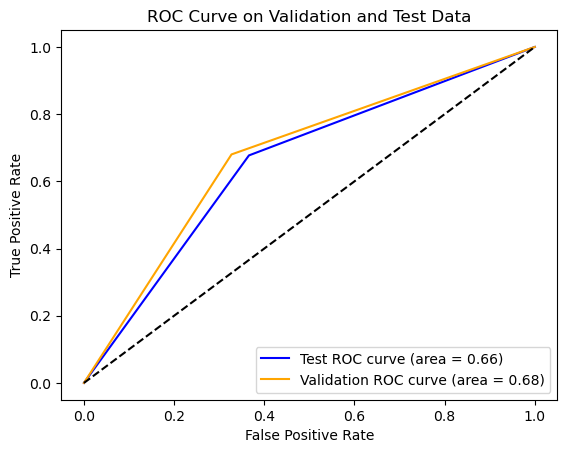

In [32]:
# Calculate ROC curve
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)

roc_auc_val = auc(fpr_val, tpr_val)
roc_auc_test = auc(fpr_test, tpr_test)

print(f'''Val -
fpr_val: {fpr_val}
tpr_val: {tpr_val}
AUC_val: {roc_auc_val}''')

print(f'''Test -
fpr_test: {fpr_test}
tpr_test: {tpr_test}
AUC_test: {roc_auc_test}''')



plt.figure()

# Plot the ROC curve of testing
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = %0.2f)' % roc_auc_test, color='blue')
plt.plot(fpr_val, tpr_val, label='Validation ROC curve (area = %0.2f)' % roc_auc_val, color='orange')
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Validation and Test Data')
plt.legend(loc="lower right")
plt.show()


# XGBOOST

Import Packages

In [10]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint


In [34]:
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.5, 0.5),
    # Add other parameters
}

In [11]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

In [37]:
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist,
                                   n_iter=25, scoring='accuracy', cv=10, verbose=2, random_state=42)


In [38]:
random_search.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV] END learning_rate=0.0849080237694725, max_depth=7, n_estimators=370, subsample=0.8659969709057025; total time=   1.7s
[CV] END learning_rate=0.0849080237694725, max_depth=7, n_estimators=370, subsample=0.8659969709057025; total time=   1.6s
[CV] END learning_rate=0.0849080237694725, max_depth=7, n_estimators=370, subsample=0.8659969709057025; total time=   1.7s
[CV] END learning_rate=0.0849080237694725, max_depth=7, n_estimators=370, subsample=0.8659969709057025; total time=   1.8s
[CV] END learning_rate=0.0849080237694725, max_depth=7, n_estimators=370, subsample=0.8659969709057025; total time=   1.7s
[CV] END learning_rate=0.0849080237694725, max_depth=7, n_estimators=370, subsample=0.8659969709057025; total time=   1.7s
[CV] END learning_rate=0.0849080237694725, max_depth=7, n_estimators=370, subsample=0.8659969709057025; total time=   1.8s
[CV] END learning_rate=0.0849080237694725, max_depth=7, n_estimators=370, su

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000188002CA550>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000018800234290>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001887C3C59D0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001880085E110>},
                   random_state=42, scoring='accuracy', verbose=2)

In [39]:
print("Best Parameters:", random_search.best_params_)


Best Parameters: {'learning_rate': 0.019333132642723086, 'max_depth': 6, 'n_estimators': 370, 'subsample': 0.728034992108518}


In [40]:
y_val_pred = random_search.predict(X_val_scaled)
y_val_proba = random_search.predict_proba(X_val_scaled)[:, 1]

In [41]:
y_test_pred = random_search.predict(X_test_scaled)
y_test_proba = random_search.predict_proba(X_test_scaled)[:, 1]

Evaluate the Model

In [43]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Helper function to calculate sensitivity and specificity
def calc_sens_spec(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
    return sensitivity, specificity

# Calculate metrics for validation set
sensitivity_val, specificity_val = calc_sens_spec(y_val, y_val_pred)
accuracy_val = accuracy_score(y_val, y_val_pred)
mcc_val = matthews_corrcoef(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)

# Calculate metrics for testing set
sensitivity_test, specificity_test = calc_sens_spec(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print validation metrics
# print(f'Validation - Sensitivity: {sensitivity_val}, Specificity: {specificity_val}, '
#       f'Accuracy: {accuracy_val}, MCC: {mcc_val}, F1 Score: {f1_val}')

print(f'''Validation -
Sensitivity: {sensitivity_val}
Specificity: {specificity_val}
Accuracy: {accuracy_val}
MCC: {mcc_val}
F1 Score: {f1_val}''')

# Print test metrics
# print(f'Test - Sensitivity: {sensitivity_test}, Specificity: {specificity_test}, '
#       f'Accuracy: {accuracy_test}, MCC: {mcc_test}, F1 Score: {f1_test}')
print(f'''Test -
Sensitivity: {sensitivity_test}
Specificity: {specificity_test}
Accuracy: {accuracy_test}
MCC: {mcc_test}
F1 Score: {f1_test}''')



Validation -
Sensitivity: 0.7022132796780685
Specificity: 0.7434343434343434
Accuracy: 0.7227822580645161
MCC: 0.4460094506121016
F1 Score: 0.7173689619732786
Test -
Sensitivity: 0.7045009784735812
Specificity: 0.6694386694386695
Accuracy: 0.6875
MCC: 0.3741711112512933
F1 Score: 0.6990291262135921


Val -
fpr_val: [0.         0.25656566 1.        ]
tpr_val: [0.         0.70221328 1.        ]
AUC_val: 0.7228238115562059
Test -
fpr_test: [0.         0.33056133 1.        ]
tpr_test: [0.         0.70450098 1.        ]
AUC_test: 0.6869698239561253


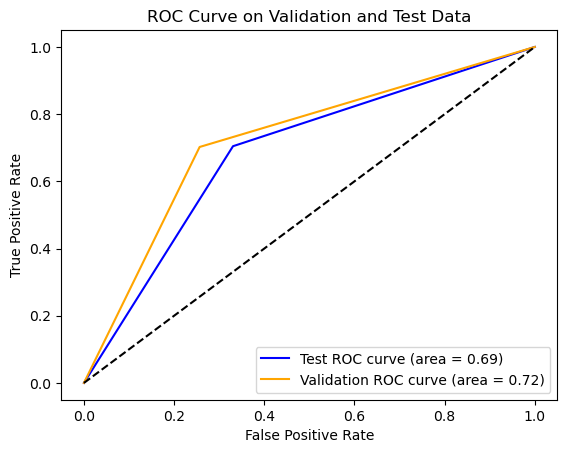

In [44]:
# Calculate ROC curve
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)

roc_auc_val = auc(fpr_val, tpr_val)
roc_auc_test = auc(fpr_test, tpr_test)

print(f'''Val -
fpr_val: {fpr_val}
tpr_val: {tpr_val}
AUC_val: {roc_auc_val}''')

print(f'''Test -
fpr_test: {fpr_test}
tpr_test: {tpr_test}
AUC_test: {roc_auc_test}''')



plt.figure()

# Plot the ROC curve of testing
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = %0.2f)' % roc_auc_test, color='blue')
plt.plot(fpr_val, tpr_val, label='Validation ROC curve (area = %0.2f)' % roc_auc_val, color='orange')
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Validation and Test Data')
plt.legend(loc="lower right")
plt.show()


## Test - Best Model

In [12]:
import xgboost as xgb

# Define the optimal parameters
optimal_params = {
    'learning_rate': 0.019333132642723086,
    'max_depth': 6,
    'n_estimators': 370,
    'subsample': 0.728034992108518
}

# Initialize the XGBoost classifier with the optimal parameters
xgb_model = xgb.XGBClassifier(**optimal_params)

# Train the model
# Assuming 'X_train_scaled' is your training features and 'y_train' is the labels
xgb_model.fit(X_train_scaled, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.019333132642723086,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=370, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [13]:
import joblib

# Save the model
joblib.dump(xgb_model, 'trained_xgb_model.pkl')


['trained_xgb_model.pkl']

In [14]:
# # Predictions
# y_pred = xgb_model.predict(X_test_scaled)

# # Evaluate the model
# # For example, calculate the accuracy or other metrics
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)


Accuracy: 0.7051411290322581


# 凸凸凸凸

In [153]:
import numpy as np
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming X_train_scaled, X_val_scaled, X_test, y_train, y_test are predefined

# Train each model and compute the ROC curve and AUC
models = {
    'SVM': SVC(random_state=42, probability=True),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'MLP': MLPClassifier(max_iter=5, random_state=42),
    'XGB': xgb.XGBClassifier(objective='binary:logistic', random_state=42),
    'LGBM': lgb.LGBMClassifier(random_state=42),
    'GB': GradientBoostingClassifier(random_state=42),
    'SGD': SGDClassifier(loss='log', random_state=42)
}

# Placeholder for model predictions
model_predictions = {}

# Fit models and calculate probabilities
for name, model in models.items():
    if name == 'XGB':
        # Perform random search and fit for XGB
        param_dist = {'n_estimators': np.arange(50, 301, 50),
                      'max_depth': np.arange(3, 10),
                      'learning_rate': uniform(0.01, 0.2)}
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=25, scoring='roc_auc',
                                           cv=10, verbose=2, random_state=42, n_jobs=-1)
        random_search.fit(X_train_scaled, y_train)
        best_model = random_search.best_estimator_
        y_scores = best_model.predict_proba(X_test)[:, 1]
    elif name in ['LGBM', 'GB', 'SGD']:
        # Assuming param_dist is predefined for these models as shown in previous code snippet
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=25, scoring='roc_auc',
                                           cv=10, verbose=2, random_state=42, n_jobs=-1)
        random_search.fit(X_train_scaled, y_train)
        best_model = random_search.best_estimator_
        y_scores = best_model.predict_proba(X_test)[:, 1]
    else:
        # Fit the model directly and predict probabilities
        model.fit(X_train_scaled, y_train)
        y_scores = model.predict_proba(X_test)[:, 1]

    # Store the predictions
    model_predictions[name] = y_scores

# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, y_scores in model_predictions.items():
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right', fontsize='small')  # Smaller legend so it does not cover the plot
plt.show()


c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


Fitting 10 folds for each of 25 candidates, totalling 250 fits
Fitting 10 folds for each of 25 candidates, totalling 250 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3952, number of negative: 3984
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3043
[LightGBM] [Info] Number of data points in the train set: 7936, number of used features: 540
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497984 -> initscore=-0.008065
[LightGBM] [Info] Start training from score -0.008065
[LightGBM] [Warning] Accuracy may be bad since you didn't 

c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


Fitting 10 folds for each of 25 candidates, totalling 250 fits


ValueError: Invalid parameter 'max_depth' for estimator SGDClassifier(learning_rate=0.0849080237694725, loss='log', random_state=42). Valid parameters are: ['alpha', 'average', 'class_weight', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'n_jobs', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'].

In [154]:
# Define classifiers and their names
models = {
    'SVM': SVC(random_state = 42, probability=True),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'MLP': MLPClassifier(max_iter=5, random_state=42),
    'XGB': xgb.XGBClassifier(objective='binary:logistic', random_state=42),
    'LGBM': lgb.LGBMClassifier(random_state=42),
    'GB': GradientBoostingClassifier(random_state=42),
    'SGD': SGDClassifier(loss='log', random_state=42)
}
classifiers = [svm_model, decision_tree_model, random_forest_model, xgb_model, mlp_model, lgbm, gb_classifier, sgd]
classifier_names = ['SVM', 'Decision Tree', 'Random Forest', 'XGB', 'MLP', 'LGBM', 'GB', 'SGD']

# Fit models and calculate probabilities
for name, model in models.items():
    if name == 'XGB':
        # Perform random search and fit for XGB
        param_dist = {'n_estimators': np.arange(50, 301, 50),
                      'max_depth': np.arange(3, 10),
                      'learning_rate': uniform(0.01, 0.2)}
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=25, scoring='roc_auc',
                                           cv=10, verbose=2, random_state=42, n_jobs=-1)
        random_search.fit(X_train_scaled, y_train)
        best_model = random_search.best_estimator_
        y_scores = best_model.predict_proba(X_test)[:, 1]
    elif name in ['LGBM', 'GB', 'SGD']:
        # Assuming param_dist is predefined for these models as shown in previous code snippet
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=25, scoring='roc_auc',
                                           cv=10, verbose=2, random_state=42, n_jobs=-1)
        random_search.fit(X_train_scaled, y_train)
        best_model = random_search.best_estimator_
        y_scores = best_model.predict_proba(X_test)[:, 1]
    else:
        # Fit the model directly and predict probabilities
        model.fit(X_train_scaled, y_train)
        y_scores = model.predict_proba(X_test)[:, 1]

    # Store the predictions
    model_predictions[name] = y_scores

# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, y_scores in model_predictions.items():
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right', fontsize='small')  # Smaller legend so it does not cover the plot
plt.show()

c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


Fitting 10 folds for each of 25 candidates, totalling 250 fits
Fitting 10 folds for each of 25 candidates, totalling 250 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3952, number of negative: 3984
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3043
[LightGBM] [Info] Number of data points in the train set: 7936, number of used features: 540
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497984 -> initscore=-0.008065
[LightGBM] [Info] Start training from score -0.008065
[LightGBM] [Warning] Accuracy may be bad since you didn't 

c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


Fitting 10 folds for each of 25 candidates, totalling 250 fits


ValueError: Invalid parameter 'max_depth' for estimator SGDClassifier(learning_rate=0.0849080237694725, loss='log', random_state=42). Valid parameters are: ['alpha', 'average', 'class_weight', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'n_jobs', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'].

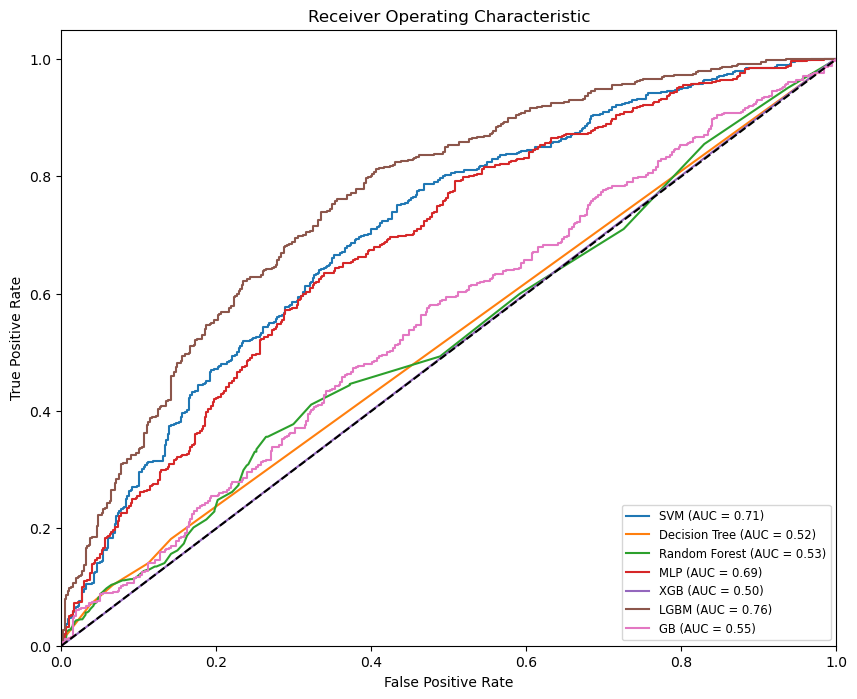

In [169]:
# Define classifiers and their names
models = {
    'SVM': SVC(random_state = 42, probability=True),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'MLP': MLPClassifier(max_iter=5, random_state=42),
    'XGB': xgb.XGBClassifier(objective='binary:logistic', random_state=42),
    'LGBM': lgb.LGBMClassifier(random_state=42),
    'GB': GradientBoostingClassifier(random_state=42),
    'SGD': SGDClassifier(loss='log', random_state=42)
}


classifiers = [svm_model, decision_tree_model, random_forest_model, xgb_model, mlp_model, lgbm, gb_classifier, sgd]
classifier_names = ['SVM', 'Decision Tree', 'Random Forest', 'XGB', 'MLP', 'LGBM', 'GB', 'SGD']

# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, y_scores in model_predictions.items():
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right', fontsize='small')  # Smaller legend so it does not cover the plot
plt.show()

c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


[LightGBM] [Info] Number of positive: 3952, number of negative: 3984
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2508
[LightGBM] [Info] Number of data points in the train set: 7936, number of used features: 540
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497984 -> initscore=-0.008065
[LightGBM] [Info] Start training from score -0.008065


c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


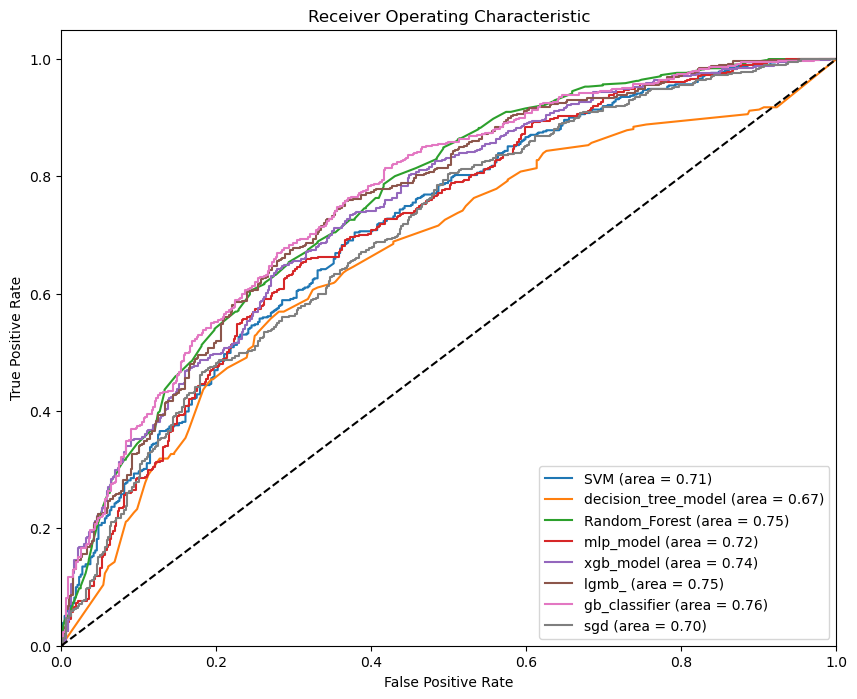

In [152]:
models = {
    'SVM': SVC(probability=True),
    'decision_tree_model': DecisionTreeClassifier(random_state=42, max_depth=10),
    'Random_Forest': RandomForestClassifier(),
    'mlp_model' : MLPClassifier(max_iter= 5, random_state=42),
    'xgb_model' : xgb.XGBClassifier(objective='binary:logistic'),
    'lgmb_': lgb.LGBMClassifier(random_state=42),
    'gb_classifier': GradientBoostingClassifier(random_state=42),
    'sgd': SGDClassifier(loss='log')
    
}

plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # 對角線
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')  # 顯示圖例
plt.show()

# SVM-Fisher

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [46]:
lda = LDA()
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_val_lda = lda.transform(X_val_scaled)
X_test_lda = lda.transform(X_test)

c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(


In [54]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# Set SVM and GridSearchCV
svm = SVC(probability=True)
parameters = {
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel Type
    'C': [0.1, 1, 10, 100]                # Regulization
    # other parameters
}
random_search = RandomizedSearchCV(estimator=svm, param_distributions=parameters,
                                   n_iter=25, scoring='accuracy', cv=10, verbose=2, random_state=42)



In [55]:
random_search.fit(X_train_lda, y_train)

c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=25. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   3.6s
[CV] END ...............................C=0.1, kernel=linear; total time=   3.6s
[CV] END ...............................C=0.1, kernel=linear; total time=   3.7s
[CV] END ...............................C=0.1, kernel=linear; total time=   3.7s
[CV] END ...............................C=0.1, kernel=linear; total time=   3.7s
[CV] END ...............................C=0.1, kernel=linear; total time=   3.7s
[CV] END ...............................C=0.1, kernel=linear; total time=   3.7s
[CV] END ...............................C=0.1, kernel=linear; total time=   3.9s
[CV] END ...............................C=0.1, kernel=linear; total time=   3.7s
[CV] END ...............................C=0.1, kernel=linear; total time=   3.7s
[CV] END ..................................C=0.1, kernel=rbf; total time=   5.8s
[CV] END ..................................C=0

RandomizedSearchCV(cv=10, estimator=SVC(probability=True), n_iter=25,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   random_state=42, scoring='accuracy', verbose=2)

In [65]:
print(X_train_lda, "\n")
print(X_train_lda.shape)

[[-0.34016901]
 [ 0.50122774]
 [ 1.11122644]
 ...
 [-0.31775985]
 [-0.00559672]
 [-0.57290523]] 

(7936, 1)


In [56]:
print("Best Parameters:", random_search.best_params_)


Best Parameters: {'kernel': 'rbf', 'C': 0.1}


In [63]:
print(X_train.shape)  # Should show (number_of_samples, 540)
print(X_val_scaled.shape)  # Should also show (number_of_samples, 540)


(7936, 540)
(992, 540)


In [66]:
y_val_pred = random_search.predict(X_val_lda)
y_val_proba = random_search.predict_proba(X_val_lda)

In [67]:
y_test_pred = random_search.predict(X_test_lda)
y_test_proba = random_search.predict_proba(X_test_lda)[:, 1]

In [68]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Helper function to calculate sensitivity and specificity
def calc_sens_spec(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
    return sensitivity, specificity

# Calculate metrics for validation set
sensitivity_val, specificity_val = calc_sens_spec(y_val, y_val_pred)
accuracy_val = accuracy_score(y_val, y_val_pred)
mcc_val = matthews_corrcoef(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)

# Calculate metrics for testing set
sensitivity_test, specificity_test = calc_sens_spec(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print validation metrics
# print(f'Validation - Sensitivity: {sensitivity_val}, Specificity: {specificity_val}, '
#       f'Accuracy: {accuracy_val}, MCC: {mcc_val}, F1 Score: {f1_val}')

print(f'''Validation -
Sensitivity: {sensitivity_val}
Specificity: {specificity_val}
Accuracy: {accuracy_val}
MCC: {mcc_val}
F1 Score: {f1_val}''')

# Print test metrics
# print(f'Test - Sensitivity: {sensitivity_test}, Specificity: {specificity_test}, '
#       f'Accuracy: {accuracy_test}, MCC: {mcc_test}, F1 Score: {f1_test}')
print(f'''Test -
Sensitivity: {sensitivity_test}
Specificity: {specificity_test}
Accuracy: {accuracy_test}
MCC: {mcc_test}
F1 Score: {f1_test}''')



Validation -
Sensitivity: 0.670020120724346
Specificity: 0.6545454545454545
Accuracy: 0.6622983870967742
MCC: 0.3246071409452313
F1 Score: 0.6653346653346652
Test -
Sensitivity: 0.8512720156555773
Specificity: 0.367983367983368
Accuracy: 0.6169354838709677
MCC: 0.2513916071277689
F1 Score: 0.696


Val -
fpr_val: [0.         0.34545455 1.        ]
tpr_val: [0.         0.67002012 1.        ]
AUC_val: 0.6622827876349003
Test -
fpr_test: [0.         0.63201663 1.        ]
tpr_test: [0.         0.85127202 1.        ]
AUC_test: 0.6096276918194726


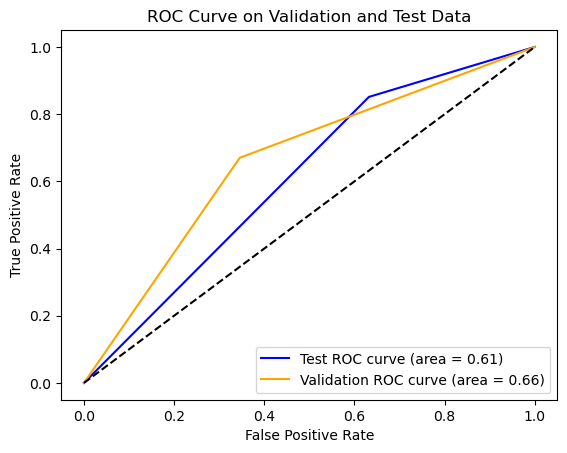

In [69]:
# Calculate ROC curve
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)

roc_auc_val = auc(fpr_val, tpr_val)
roc_auc_test = auc(fpr_test, tpr_test)

print(f'''Val -
fpr_val: {fpr_val}
tpr_val: {tpr_val}
AUC_val: {roc_auc_val}''')

print(f'''Test -
fpr_test: {fpr_test}
tpr_test: {tpr_test}
AUC_test: {roc_auc_test}''')



plt.figure()

# Plot the ROC curve of testing
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = %0.2f)' % roc_auc_test, color='blue')
plt.plot(fpr_val, tpr_val, label='Validation ROC curve (area = %0.2f)' % roc_auc_val, color='orange')
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Validation and Test Data')
plt.legend(loc="lower right")
plt.show()


# LGBM Classifier

In [108]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Define the parameter grid
param_dist = {
    'num_leaves': sp_randint(6, 50), 
    'min_child_samples': sp_randint(100, 500), 
    'min_child_weight': [1e-5, 1e-2, 0.1, 1, 100], 
    'subsample': sp_uniform(loc=0.2, scale=0.8), 
    'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
    'reg_alpha': [0, 1e-1, 1, 2, 10],
    'reg_lambda': [0, 1e-1, 1, 5, 10]
}




In [109]:
# Initialize the LightGBM classifier
lgbm = lgb.LGBMClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(lgbm, param_distributions=param_dist, 
                                   n_iter=10, cv=10, verbose=1, random_state=42, n_jobs=-1)

In [110]:
# Fit the model
random_search.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Info] Number of positive: 3952, number of negative: 3984
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3043
[LightGBM] [Info] Number of data points in the train set: 7936, number of used features: 540
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497984 -> initscore=-0.008065
[LightGBM] [Info] Start training from score -0.008065
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

RandomizedSearchCV(cv=10, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000188411638D0>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000018841582450>,
                                        'min_child_weight': [1e-05, 0.01, 0.1,
                                                             1, 100],
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000018840EE5B90>,
                                        'reg_alpha': [0, 0.1, 1, 2, 10],
                                        'reg_lambda': [0, 0.1, 1, 5, 10],
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000188411632D0>},
                   random_state=42, verbose=1)

In [111]:
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")


Best Parameters: {'colsample_bytree': 0.764526911140863, 'min_child_samples': 120, 'min_child_weight': 1e-05, 'num_leaves': 44, 'reg_alpha': 0.1, 'reg_lambda': 5, 'subsample': 0.9537614045478822}
Best Score: 0.7188781879226609


In [112]:
# Evaluate the best model (optional, can use the test set or validation set)
best_model = random_search.best_estimator_
val_predictions = best_model.predict(X_val_scaled)

val_score = best_model.score(X_val_scaled, y_val)
test_score = best_model.score(X_test_scaled, y_test)

print(f"Validation Score: {val_score}")
print(f"Test Score: {test_score}")


Validation Score: 0.7237903225806451
Test Score: 0.6824596774193549


In [113]:
y_val_pred = random_search.predict(X_val_scaled)
y_val_proba = random_search.predict_proba(X_val_scaled)[:, 1]

In [114]:
y_test_pred = random_search.predict(X_test_scaled)
y_test_proba = random_search.predict_proba(X_test_scaled)[:, 1]

Evaluation

In [115]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Helper function to calculate sensitivity and specificity
def calc_sens_spec(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
    return sensitivity, specificity

# Calculate metrics for validation set
sensitivity_val, specificity_val = calc_sens_spec(y_val, y_val_pred)
accuracy_val = accuracy_score(y_val, y_val_pred)
mcc_val = matthews_corrcoef(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)

# Calculate metrics for testing set
sensitivity_test, specificity_test = calc_sens_spec(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print validation metrics
# print(f'Validation - Sensitivity: {sensitivity_val}, Specificity: {specificity_val}, '
#       f'Accuracy: {accuracy_val}, MCC: {mcc_val}, F1 Score: {f1_val}')

print(f'''Validation -
Sensitivity: {sensitivity_val}
Specificity: {specificity_val}
Accuracy: {accuracy_val}
MCC: {mcc_val}
F1 Score: {f1_val}''')

# Print test metrics
# print(f'Test - Sensitivity: {sensitivity_test}, Specificity: {specificity_test}, '
#       f'Accuracy: {accuracy_test}, MCC: {mcc_test}, F1 Score: {f1_test}')
print(f'''Test -
Sensitivity: {sensitivity_test}
Specificity: {specificity_test}
Accuracy: {accuracy_test}
MCC: {mcc_test}
F1 Score: {f1_test}''')



Validation -
Sensitivity: 0.7082494969818913
Specificity: 0.7393939393939394
Accuracy: 0.7237903225806451
MCC: 0.44784736836391614
F1 Score: 0.7198364008179958
Test -
Sensitivity: 0.6947162426614482
Specificity: 0.6694386694386695
Accuracy: 0.6824596774193549
MCC: 0.3642282716424842
F1 Score: 0.6926829268292684


Val -
fpr_val: [0.         0.         0.         0.0020202  0.0020202  0.0040404
 0.0040404  0.00606061 0.00606061 0.00808081 0.00808081 0.01010101
 0.01010101 0.01212121 0.01212121 0.01818182 0.01818182 0.02222222
 0.02222222 0.02626263 0.02626263 0.02828283 0.02828283 0.03030303
 0.03030303 0.03232323 0.03232323 0.03434343 0.03434343 0.03636364
 0.03636364 0.04040404 0.04040404 0.04242424 0.04242424 0.04444444
 0.04444444 0.04646465 0.04646465 0.04848485 0.04848485 0.05050505
 0.05050505 0.05454545 0.05454545 0.05656566 0.05656566 0.05858586
 0.05858586 0.06060606 0.06060606 0.06262626 0.06262626 0.06464646
 0.06464646 0.06666667 0.06666667 0.06868687 0.06868687 0.07070707
 0.07070707 0.07272727 0.07272727 0.07474747 0.07474747 0.07676768
 0.07676768 0.08080808 0.08080808 0.08282828 0.08282828 0.08484848
 0.08484848 0.08888889 0.08888889 0.09090909 0.09090909 0.09494949
 0.09494949 0.0969697  0.0969697  0.0989899  0.0989899  0.1010101
 0.1010101  0.1030303  0.1030303  0.10505051 0.10

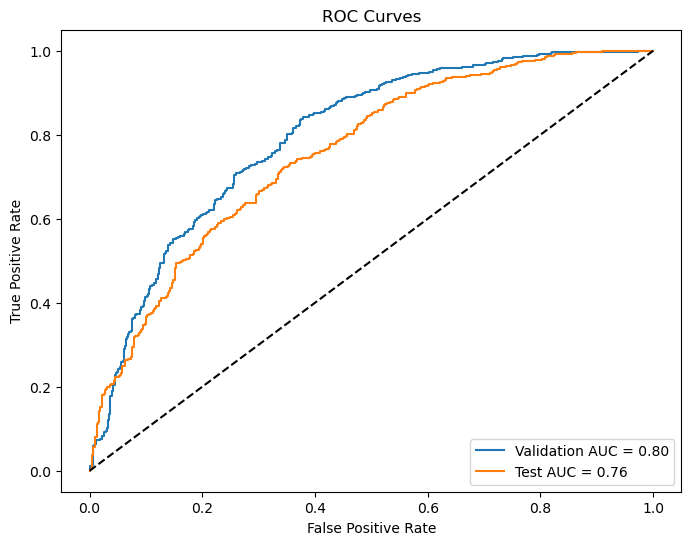

In [116]:
# Calculate ROC curve
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

roc_auc_val = auc(fpr_val, tpr_val)
roc_auc_test = auc(fpr_test, tpr_test)

print(f'''Val -
fpr_val: {fpr_val}
tpr_val: {tpr_val}
AUC_val: {roc_auc_val}''')

print(f'''Test -
fpr_test: {fpr_test}
tpr_test: {tpr_test}
AUC_test: {roc_auc_test}''')



# plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, label=f'Validation AUC = {roc_auc_val:.2f}')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {roc_auc_test:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

## Test - Best Parameter

In [8]:
import lightgbm as lgb

# Best parameters obtained from RandomizedSearchCV
best_params = {
    'colsample_bytree': 0.764526911140863, 
    'min_child_samples': 120, 
    'min_child_weight': 1e-05, 
    'num_leaves': 44, 
    'reg_alpha': 0.1, 
    'reg_lambda': 5, 
    'subsample': 0.9537614045478822
}

# Initialize LightGBM with the best parameters
lgbm_best = lgb.LGBMClassifier(**best_params, random_state=42)

# Train the model on the training data
lgbm_best.fit(X_train_scaled, y_train)

# Now, lgbm_best is your trained model with the best parameters


[LightGBM] [Info] Number of positive: 3952, number of negative: 3984
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010580 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3043
[LightGBM] [Info] Number of data points in the train set: 7936, number of used features: 540
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497984 -> initscore=-0.008065
[LightGBM] [Info] Start training from score -0.008065
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

LGBMClassifier(colsample_bytree=0.764526911140863, min_child_samples=120,
               min_child_weight=1e-05, num_leaves=44, random_state=42,
               reg_alpha=0.1, reg_lambda=5, subsample=0.9537614045478822)

In [6]:
!pip install joblib

In [9]:
import joblib

# Save the trained LightGBM model
joblib.dump(lgbm_best, 'trained_lgbm_model.pkl')


['trained_lgbm_model.pkl']

In [ ]:
# Load the model
loaded_model = joblib.load('trained_lgbm_model.pkl')

# Use 'loaded_model' for predictions or further analysis


### Load Dataset 

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the new dataset
EAAC = pd.read_csv("C:/Users/ddes2/Desktop/桌面/BML/Assignment_3/test_EAAC.txt", sep = "\t")

# Preprocess the data as per the original training data's preprocessing
# For example, if you need to scale your features:
scaler = StandardScaler()
new_data_scaled = scaler.fit_transform(EAAC) 


In [ ]:
EAAC.head()

In [ ]:
df_EAAC = pd.DataFrame(EAAC)
df_EAAC.head()

In [ ]:
df_EAAC.to_csv("C:/Users/ddes2/Desktop/桌面/BML/Assignment_3/test_EAAC.csv")

In [ ]:
import joblib

# Load the trained LightGBM model
model = joblib.load('trained_lgbm_model.pkl')


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the new dataset
new_data = pd.read_csv('path_to_your_new_data.csv')

# Preprocess the data as per the original training data's preprocessing
# For example, if you need to scale your features:
scaler = StandardScaler()
new_data_scaled = scaler.fit_transform(new_data)  


In [ ]:
# Make predictions
predictions = model.predict(new_data_scaled)

# Append predictions to the original DataFrame
new_data_scaled['Predicted_Label'] = predictions

In [ ]:
# Save the DataFrame with the predictions to a new CSV
new_data_scaled.to_csv('path_to_your_data_with_predictions.csv', index=False)


# GB Classfier

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Initialize the Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Define the parameter distribution
param_dist = {
    'n_estimators': np.arange(50, 301, 50),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': np.arange(3, 11),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'max_features': ['sqrt', 'log2', None]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist,
    n_iter=5,  # You can change the number of iterations
    cv=10,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the Randomized Search object on the training data
random_search.fit(X_train_scaled, y_train)




Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [85]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_



print(f"Best Parameters: {best_params}")
print(f"Best Model: {best_model}")


Best Parameters: {'n_estimators': 200, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 4, 'learning_rate': 0.05}
Best Model: GradientBoostingClassifier(learning_rate=0.05, max_depth=4, min_samples_leaf=3,
                           min_samples_split=6, n_estimators=200)


In [86]:
y_val_pred = random_search.predict(X_val_scaled)
y_val_proba = random_search.predict_proba(X_val_scaled)[:, 1]

In [87]:
y_test_pred = random_search.predict(X_test_scaled)
y_test_proba = random_search.predict_proba(X_test_scaled)[:, 1]

In [88]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Helper function to calculate sensitivity and specificity
def calc_sens_spec(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
    return sensitivity, specificity

# Calculate metrics for validation set
sensitivity_val, specificity_val = calc_sens_spec(y_val, y_val_pred)
accuracy_val = accuracy_score(y_val, y_val_pred)
mcc_val = matthews_corrcoef(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)

# Calculate metrics for testing set
sensitivity_test, specificity_test = calc_sens_spec(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print validation metrics
# print(f'Validation - Sensitivity: {sensitivity_val}, Specificity: {specificity_val}, '
#       f'Accuracy: {accuracy_val}, MCC: {mcc_val}, F1 Score: {f1_val}')

print(f'''Validation -
Sensitivity: {sensitivity_val}
Specificity: {specificity_val}
Accuracy: {accuracy_val}
MCC: {mcc_val}
F1 Score: {f1_val}''')

# Print test metrics
# print(f'Test - Sensitivity: {sensitivity_test}, Specificity: {specificity_test}, '
#       f'Accuracy: {accuracy_test}, MCC: {mcc_test}, F1 Score: {f1_test}')
print(f'''Test -
Sensitivity: {sensitivity_test}
Specificity: {specificity_test}
Accuracy: {accuracy_test}
MCC: {mcc_test}
F1 Score: {f1_test}''')



Validation -
Sensitivity: 0.6881287726358148
Specificity: 0.7515151515151515
Accuracy: 0.719758064516129
MCC: 0.440504232291826
F1 Score: 0.711018711018711
Test -
Sensitivity: 0.6829745596868885
Specificity: 0.6881496881496881
Accuracy: 0.6854838709677419
MCC: 0.37096128409676105
F1 Score: 0.6910891089108911


Val -
fpr_val: [0.         0.         0.         0.0020202  0.0020202  0.0040404
 0.0040404  0.00606061 0.00606061 0.00808081 0.00808081 0.01010101
 0.01010101 0.01414141 0.01414141 0.01616162 0.01616162 0.01818182
 0.01818182 0.02020202 0.02020202 0.02222222 0.02222222 0.02424242
 0.02424242 0.02626263 0.02626263 0.03232323 0.03232323 0.03434343
 0.03434343 0.03636364 0.03636364 0.04040404 0.04040404 0.04242424
 0.04242424 0.04444444 0.04444444 0.04646465 0.04646465 0.04848485
 0.04848485 0.05252525 0.05252525 0.05656566 0.05656566 0.05858586
 0.05858586 0.06262626 0.06262626 0.06464646 0.06464646 0.06666667
 0.06666667 0.06868687 0.06868687 0.07070707 0.07070707 0.07272727
 0.07272727 0.07474747 0.07474747 0.07676768 0.07676768 0.07878788
 0.07878788 0.08080808 0.08080808 0.08484848 0.08484848 0.08686869
 0.08686869 0.08888889 0.08888889 0.09090909 0.09090909 0.09292929
 0.09292929 0.09494949 0.09494949 0.1010101  0.1010101  0.10505051
 0.10505051 0.10707071 0.10707071 0.10909091 0.1

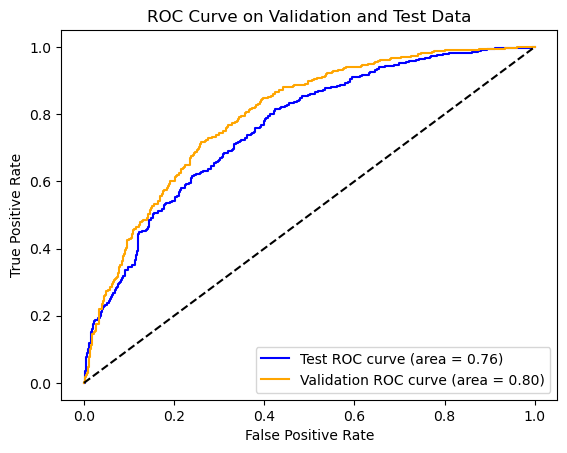

In [89]:
# Calculate ROC curve
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

roc_auc_val = auc(fpr_val, tpr_val)
roc_auc_test = auc(fpr_test, tpr_test)

print(f'''Val -
fpr_val: {fpr_val}
tpr_val: {tpr_val}
AUC_val: {roc_auc_val}''')

print(f'''Test -
fpr_test: {fpr_test}
tpr_test: {tpr_test}
AUC_test: {roc_auc_test}''')



plt.figure()

# Plot the ROC curve of testing
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = %0.2f)' % roc_auc_test, color='blue')
plt.plot(fpr_val, tpr_val, label='Validation ROC curve (area = %0.2f)' % roc_auc_val, color='orange')
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Validation and Test Data')
plt.legend(loc="lower right")
plt.show()


## Best Model

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
gbc = GradientBoostingClassifier(learning_rate=0.05, max_depth=4, min_samples_leaf=3,
                                 min_samples_split=6, n_estimators=200)

In [8]:
gbc.fit(X_train_scaled, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=4, min_samples_leaf=3,
                           min_samples_split=6, n_estimators=200)

In [9]:
import joblib

# Save the model
joblib.dump(gbc, 'trained_gbc_model.pkl')


['trained_gbc_model.pkl']

# SGD Classifier

In [147]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Initiate
sgd = SGDClassifier(loss='log')

#
param_dist = {
    'alpha': uniform(1e-6, 1e-2),  # normalize
    'penalty': ['l2', 'l1', 'elasticnet'],

}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=sgd,
    param_distributions=param_dist,
    n_iter = 5 ,
    cv=10,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Random Search
random_search.fit(X_train_scaled, y_train)

# Best parameters
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best parameters: ", best_params)
print("Best model:", best_model)


Fitting 10 folds for each of 5 candidates, totalling 50 fits


c:\Users\ddes2\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Best parameters:  {'alpha': 0.0059695015794648705, 'penalty': 'l1'}
Best model: SGDClassifier(alpha=0.0059695015794648705, loss='log', penalty='l1')


In [148]:
y_val_pred = random_search.predict(X_val_scaled)
y_val_proba = random_search.predict_proba(X_val_scaled)[:, 1]

y_test_pred = random_search.predict(X_test_scaled)
y_test_proba = random_search.predict_proba(X_test_scaled)[:, 1]

In [149]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Helper function to calculate sensitivity and specificity
def calc_sens_spec(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
    return sensitivity, specificity

# Calculate metrics for validation set
sensitivity_val, specificity_val = calc_sens_spec(y_val, y_val_pred)
accuracy_val = accuracy_score(y_val, y_val_pred)
mcc_val = matthews_corrcoef(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)

# Calculate metrics for testing set
sensitivity_test, specificity_test = calc_sens_spec(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print validation metrics
# print(f'Validation - Sensitivity: {sensitivity_val}, Specificity: {specificity_val}, '
#       f'Accuracy: {accuracy_val}, MCC: {mcc_val}, F1 Score: {f1_val}')

print(f'''Validation -
Sensitivity: {sensitivity_val}
Specificity: {specificity_val}
Accuracy: {accuracy_val}
MCC: {mcc_val}
F1 Score: {f1_val}''')

# Print test metrics
# print(f'Test - Sensitivity: {sensitivity_test}, Specificity: {specificity_test}, '
#       f'Accuracy: {accuracy_test}, MCC: {mcc_test}, F1 Score: {f1_test}')
print(f'''Test -
Sensitivity: {sensitivity_test}
Specificity: {specificity_test}
Accuracy: {accuracy_test}
MCC: {mcc_test}
F1 Score: {f1_test}''')



Validation -
Sensitivity: 0.6177062374245473
Specificity: 0.7373737373737373
Accuracy: 0.6774193548387096
MCC: 0.35761832455063186
F1 Score: 0.657387580299786
Test -
Sensitivity: 0.6164383561643836
Specificity: 0.6964656964656964
Accuracy: 0.655241935483871
MCC: 0.31354252614674816
F1 Score: 0.6481481481481481


Val -
fpr_val: [0.         0.26262626 1.        ]
tpr_val: [0.         0.61770624 1.        ]
AUC_val: 0.6775399873991423
Test -
fpr_test: [0.        0.3035343 1.       ]
tpr_test: [0.         0.61643836 1.        ]
AUC_test: 0.65645202631504


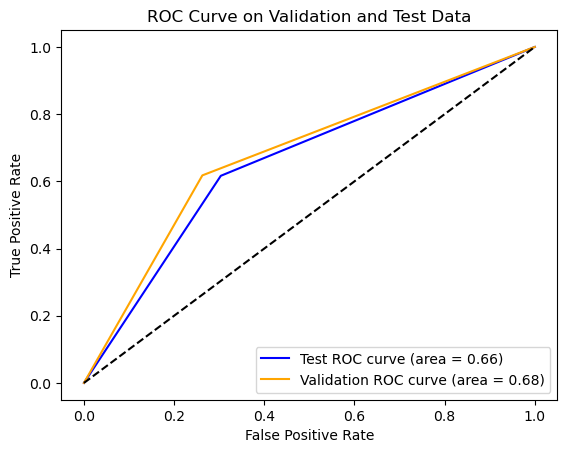

In [150]:
# Calculate ROC curve
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)

roc_auc_val = auc(fpr_val, tpr_val)
roc_auc_test = auc(fpr_test, tpr_test)

print(f'''Val -
fpr_val: {fpr_val}
tpr_val: {tpr_val}
AUC_val: {roc_auc_val}''')

print(f'''Test -
fpr_test: {fpr_test}
tpr_test: {tpr_test}
AUC_test: {roc_auc_test}''')



plt.figure()

# Plot the ROC curve of testing
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = %0.2f)' % roc_auc_test, color='blue')
plt.plot(fpr_val, tpr_val, label='Validation ROC curve (area = %0.2f)' % roc_auc_val, color='orange')
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Validation and Test Data')
plt.legend(loc="lower right")
plt.show()
